In [1]:
import pandas as pd
import numpy as np
import xgboost 
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

In [2]:
bank=pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
bank.shape

(11162, 17)

In [5]:
# Count of target values
bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [6]:
# Setting numeric values for boolean variables
bank['default'] = bank.default.map({'yes':1, 'no':0})
bank['housing'] = bank.housing.map({'yes':1, 'no':0})
bank['loan'] = bank.loan.map({'yes':1, 'no':0})
bank['deposit'] = bank.deposit.map({'yes':1, 'no':0})

In [7]:
# Getting Dummy values
for col in['job', 'marital', 'education', 'contact', 'month', 'poutcome']:
    bank = pd.concat([bank.drop(col, axis = 1),pd.get_dummies(bank[col], prefix=col, prefix_sep='_', drop_first = True, dummy_na = False)], axis=1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [8]:
# Dropping the contact column
bank.drop('contact_unknown', axis=1, inplace=True)
# Putting features to X and y values
X = bank.drop('deposit', axis=1)
y = bank['deposit']
# Dropping pdays as well
bank.drop('pdays', axis=1, inplace=True)
# train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)
# Calling the XGBoost classifier
xgb = xgboost.XGBClassifier(n_estimators = 100, learning_rate = 0.08, gamma = 0, subsample = 0.75, colsample_bytree = 1, max_depth = 7)
# Fitting the model.
xgb.fit(X_train, y_train.squeeze().values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [9]:
# Predicting the test values
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)
# Accuracy for training
print('XGB accuracy for training: %.3f')
accuracy_score(y_train, y_train_preds)

# Accuracy for Testing
print('XGB accuracy score for Test: %.3f')
accuracy_score(y_test, y_test_preds)

# Getting the significant features that can make campaign successful
headers = ['name', 'score']
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x:x[1]*-1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)
# Features that are being plotted
xgb_feature_importances

XGB accuracy for training: %.3f
XGB accuracy score for Test: %.3f


,name,score
0,poutcome_success,0.143357
1,housing,0.087022
2,duration,0.065018
3,month_mar,0.061656
4,month_oct,0.038064
5,month_may,0.033511
6,month_sep,0.030436
7,month_jul,0.029422
8,pdays,0.028110
9,month_dec,0.027015


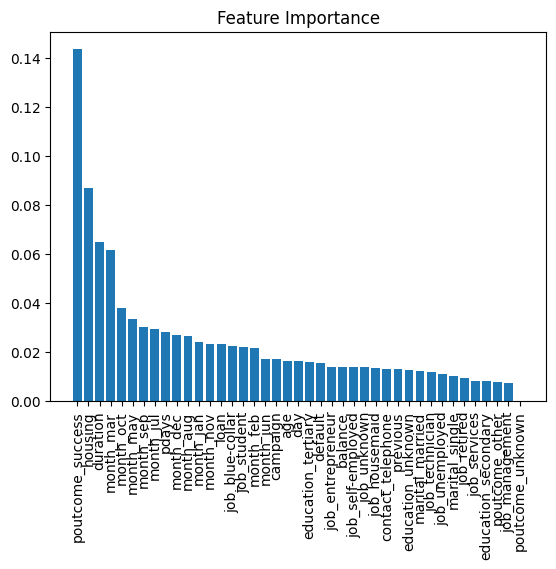

In [11]:
# Plotting the important features
import matplotlib.pyplot as plt
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()